In [1]:
%matplotlib notebook

In [2]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [4]:
#loading and reading the csv file
crimes_csv = "../output/crimes_csv.csv"
crimes_pd = pd.read_csv(crimes_csv)
crimes_pd['occurrencedate'] = pd.to_datetime(crimes_pd['occurrencedate'], unit = 'ms')
crimes_pd.head()

,Unnamed: 0,Hood_ID,Index_,MCI,Neighbourhood,event_unique_id,occurrencedate,occurrenceday,occurrencedayofweek,occurrencedayofyear,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype
0,0,84,976,Assault,Little Portugal (84),GO-2015942420,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
1,1,25,977,Assault,Glenfield-Jane Heights (25),GO-20162295518,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
2,2,71,978,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
3,3,71,979,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
4,4,58,980,Theft Over,Old East York (58),GO-20141573896,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Theft Over,House


In [5]:
premise_type = crimes_pd.groupby('offence').size()
premise_type = premise_type.reset_index()
premise_type = premise_type.rename(columns= {0: 'Crime Count',
                                                         'offence' : 'Premise Type'
                                                        })
premise_type = premise_type.sort_values(by = 'Crime Count', ascending = False)
premise_type

,Premise Type,Crime Count
5,Assault,48470
12,B&E,22771
38,Theft Of Motor Vehicle,13435
11,Assault With Weapon,11433
27,Robbery - Mugging,4866
15,B&E W'Intent,3618
8,Assault Bodily Harm,3402
40,Theft Over,2363
28,Robbery - Other,2361
33,Robbery With Weapon,2301


<IPython.core.display.Javascript object>


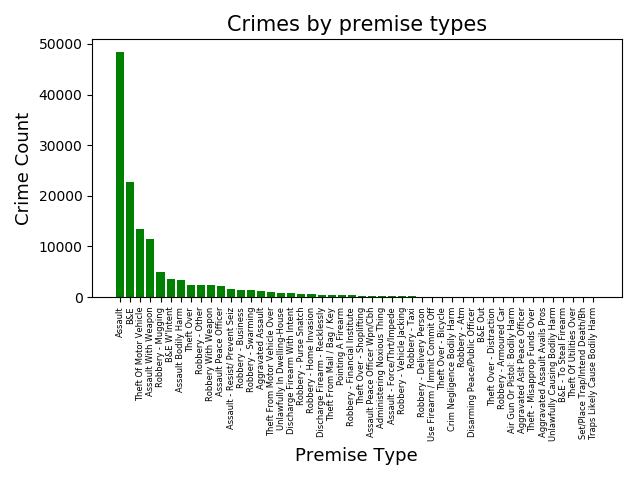

In [6]:
plt.bar(premise_type['Premise Type'], premise_type['Crime Count'], color='green')
    
plt.title('Crimes by premise types', fontsize = 15)
plt.xlabel('Premise Type', fontsize = 13)
plt.ylabel('Crime Count', fontsize = 13)
plt.xticks(rotation = 'vertical', fontsize = 6)
plt.tight_layout()
plt.savefig('../output/Crimes by premise types')
plt.show()